# 1) Setup

In [1]:
# Run the following command to install Jupyter via Docker container:
# docker run -p 8888:8888 -v $(pwd):/home/jovyan/work jupyter/tensorflow-notebook

# Run this command once:
# !conda install graphviz -y

# 2) Preparing the Data

## Import

In [2]:
import pandas as pd

In [3]:
# Read in the CSV file
original_data = pd.read_csv("car-data.csv")

In [4]:
# Preview the imported records
original_data

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,1,82,ford,mustang gl
394,44.0,4,97.0,52,2130,24.6,2,82,vw,pickup
395,32.0,4,135.0,84,2295,11.6,1,82,dodge,rampage
396,28.0,4,120.0,79,2625,18.6,1,82,ford,ranger


In [5]:
# View the first 5 records
original_data.head()

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [6]:
# View the last 3 records
original_data.tail(3)

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
395,32.0,4,135.0,84,2295,11.6,1,82,dodge,rampage
396,28.0,4,120.0,79,2625,18.6,1,82,ford,ranger
397,31.0,4,119.0,82,2720,19.4,1,82,chevy,s-10


In [7]:
# View row #11
original_data.iloc[10]

mpg                 15.0
cyl                    8
disp               383.0
hp                   170
wgt                 3563
acc                 10.0
country                1
year                  70
make               dodge
model      challenger se
Name: 10, dtype: object

## Cleanup / Validation

In [8]:
# Make a copy of my imported data
data = original_data.copy()

In [9]:
data.head()

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [10]:
# Rename the columns
cols = {
        "mpg":     "MPG",
        "cyl":     "Cylinders",
        "disp":    "Displacement",
        "hp":      "Horsepower",
        "wgt":     "Weight",
        "acc":     "Acceleration",
        "country": "Country",
        "year":    "Year", 
        "make":    "Make",
        "model":   "Model"
}
data = data.rename(columns=cols)

In [11]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Country,Year,Make,Model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [12]:
# Look for null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Country         0
Year            0
Make            0
Model           2
dtype: int64

In [13]:
# View the data types
data.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Country           int64
Year              int64
Make             object
Model            object
dtype: object

In [14]:
data.iloc[32]

MPG              25.0
Cylinders           4
Displacement     98.0
Horsepower          ?
Weight           2046
Acceleration     19.0
Country             1
Year               71
Make             ford
Model           pinto
Name: 32, dtype: object

In [15]:
# Replace ? with blanks
data.replace(to_replace="?", value=None, inplace=True)

In [16]:
# Drop records with missing values
data = data.dropna()

In [17]:
# Convert Horsepower to int
data['Horsepower'] = data['Horsepower'].astype(int)

In [18]:
data.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Country           int64
Year              int64
Make             object
Model            object
dtype: object

In [19]:
# format year
data["Year"] = data["Year"].add(1900)

# 3) Feature Selection & Feature Engineering

In [20]:
data.head(1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Country,Year,Make,Model
0,18.0,8,307.0,130,3504,12.0,1,1970,chevrolet,chevelle malibu


In [21]:
# Drop the Make and Model columns
data = data.drop("Make", axis=1)
data = data.drop("Model", axis=1)

In [22]:
data.head(1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Country,Year
0,18.0,8,307.0,130,3504,12.0,1,1970


In [23]:
# Change country to one hot encoding
data['Country'] = data['Country'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
data = pd.get_dummies(data, columns=['Country'], prefix='', prefix_sep='')

In [24]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Europe,Japan,USA
0,18.0,8,307.0,130,3504,12.0,1970,0,0,1
1,15.0,8,350.0,165,3693,11.5,1970,0,0,1
2,18.0,8,318.0,150,3436,11.0,1970,0,0,1
3,16.0,8,304.0,150,3433,12.0,1970,0,0,1
4,17.0,8,302.0,140,3449,10.5,1970,0,0,1


In [25]:
# Pairwise correlation
data.corr(numeric_only=True)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Europe,Japan,USA
MPG,1.000000,-0.777254,-0.804760,-0.777768,-0.831764,0.422076,0.579658,0.246606,0.449369,-0.563736
Cylinders,-0.777254,1.000000,0.950638,0.842898,0.897210,-0.504300,-0.345426,-0.355225,-0.400235,0.608541
Displacement,-0.804760,0.950638,1.000000,0.897275,0.932769,-0.543423,-0.369486,-0.374646,-0.437174,0.654213
Horsepower,-0.777768,0.842898,0.897275,1.000000,0.864284,-0.688670,-0.415064,-0.286980,-0.319117,0.488148
Weight,-0.831764,0.897210,0.932769,0.864284,1.000000,-0.415836,-0.307805,-0.296699,-0.444370,0.598945
Acceleration,0.422076,-0.504300,-0.543423,-0.688670,-0.415836,1.000000,0.288478,0.209536,0.112154,-0.256880
Year,0.579658,-0.345426,-0.369486,-0.415064,-0.307805,0.288478,1.000000,-0.036896,0.198186,-0.134272
Europe,0.246606,-0.355225,-0.374646,-0.286980,-0.296699,0.209536,-0.036896,1.000000,-0.227929,-0.597345
Japan,0.449369,-0.400235,-0.437174,-0.319117,-0.444370,0.112154,0.198186,-0.227929,1.000000,-0.644722
USA,-0.563736,0.608541,0.654213,0.488148,0.598945,-0.256880,-0.134272,-0.597345,-0.644722,1.000000


<AxesSubplot: xlabel='Weight', ylabel='MPG'>

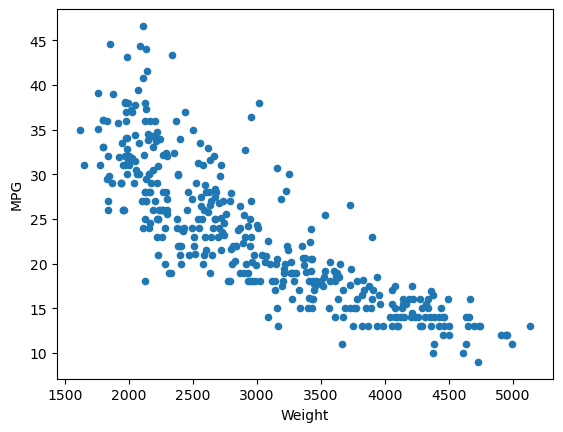

In [26]:
# Graph Weight vs MPG
data.plot(kind="scatter", x="Weight", y="MPG")

<AxesSubplot: xlabel='Displacement', ylabel='MPG'>

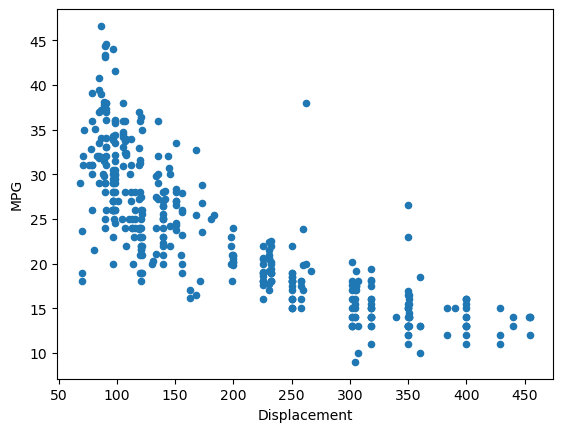

In [27]:
# Graph Displacement vs MPG
data.plot(kind="scatter", x="Displacement", y="MPG")

<AxesSubplot: xlabel='Horsepower', ylabel='MPG'>

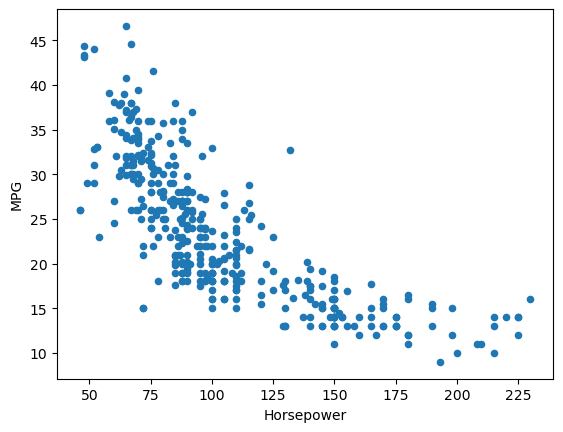

In [28]:
# Graph Horsepower vs MPG
data.plot(kind="scatter", x="Horsepower", y="MPG")

<AxesSubplot: xlabel='Cylinders', ylabel='MPG'>

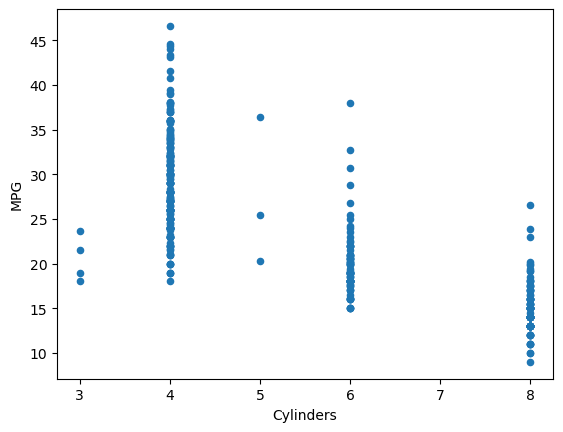

In [29]:
# Graph Cylinders vs MPG
data.plot(kind="scatter", x="Cylinders", y="MPG")

In [30]:
# Check for class imbalance
print("USA: ", data["USA"].sum())
print("Europe: ", data["Europe"].sum())
print("Japan: ", data["Japan"].sum())

USA:  245
Europe:  68
Japan:  77


In [31]:
# Drop country fields
data = data.drop("USA", axis=1)
data = data.drop("Europe", axis=1)
data = data.drop("Japan", axis=1)

In [32]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


# 4) Model Training and Evaluation

## Data split (training vs testing)

In [33]:
# Training data
training_data = data.head(310)

# Testing data
testing_data = data.tail(80)

## Model 1 (Linear Regression with a single variable)

In [34]:
# y = mx + b

# x = horsepower
# y = mpg

In [35]:
# Import some libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2023-01-11 20:09:08.233026: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
# Define our first model
model1 = tf.keras.Sequential()

2023-01-11 20:09:12.055934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
# Define layers

# Define layer 1
layer1 = tf.keras.layers.Dense(1, input_shape=(1,))

# Add layers to the model
model1.add(layer1)

In [38]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
# Compile model1
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [41]:
# Train model1
history1 = model1.fit(
    training_data['Horsepower'],  # Feature
    training_data['MPG'],         # Label (Target value)
    epochs = 100,                 # Rounds of training
    validation_split = 0.2)       # Use 20% of the training data for validation

/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
8/8 [==============================] - 1s 23ms/step - loss: 122.0516 - val_loss: 55.3104
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 34.9455 - val_loss: 22.3192
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 26.6220 - val_loss: 24.7877
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 14.3320 - val_loss: 13.5154
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 16.7082 - val_loss: 10.9005
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 12.1859 - val_loss: 13.3305
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 11.3018 - val_loss: 9.9481
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 11.4434 - val_loss: 13.7129
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 11.1167 - val_loss: 11.6673
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 10.8325 - val_loss: 10.5774
Epoch 11

In [42]:
# Plot horsepower vs MPG
def plot_HPvsMPG(data_hp, data_mph, pred_hp, pred_mpg):
  # Plot real data
  plt.scatter(data_hp, data_mph, label='Data')

  # Plot predictions
  plt.plot(pred_hp, pred_mpg, color='k', label='Predictions')

  # Show legend
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [43]:
# Real data
hp1 = training_data['Horsepower']
mpg1 = training_data['MPG']

# Predicted values
hp2 = tf.linspace(0, 250, 251)
mpg2 = model1.predict(hp2)

8/8 [==============================] - 0s 2ms/step


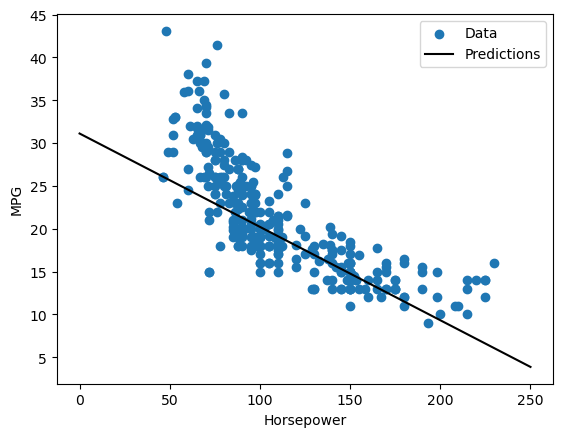

In [44]:
plot_HPvsMPG(hp1, mpg1, hp2, mpg2)

In [45]:
# Get final results for model1
testing = model1.evaluate(testing_data['Horsepower'], testing_data['MPG'], verbose=0)
training = pd.DataFrame(history1.history).iloc[99]['loss']

results = {}
results['Baseline'] = training, testing

In [46]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.237612,9.596869


# 5) Improving the model

In [47]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


## Model 2 (with Normalized data)

In [48]:
# Define model 2
model2 = tf.keras.Sequential()

# Define layer 1
layer1 = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
layer1.adapt(np.array(training_data['Horsepower']))

# Define layer 2
layer2 = tf.keras.layers.Dense(1)

# Add layers
model2.add(layer1)
model2.add(layer2)

In [49]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [50]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [51]:
# Compile model2
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [52]:
# Train model2
history2 = model2.fit(
    training_data['Horsepower'],
    training_data['MPG'],
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 0s 2ms/step


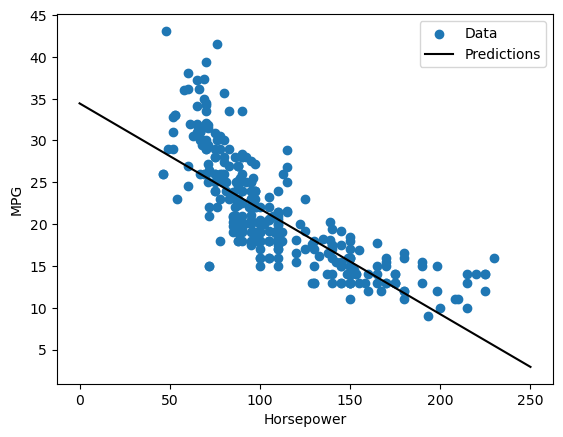

In [53]:
hp1 = training_data['Horsepower']
mpg1 = training_data['MPG']

hp2 = tf.linspace(0, 250, 251)
mpg2 = model2.predict(hp2)

plot_HPvsMPG(hp1, mpg1, hp2, mpg2)

In [54]:
# See the results
testing = model2.evaluate(testing_data['Horsepower'], testing_data['MPG'], verbose=0)
training = pd.DataFrame(history2.history).iloc[99]['loss']
results['Normalization'] = training, testing

In [55]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.237612,9.596869
Normalization,3.003903,7.795870


## Model 3 (With proper sampling)

In [56]:
# Re-define training and testing data
training_data = data.sample(frac=.8, random_state=0)
testing_data = data.drop(training_data.index)

In [57]:
# Define model 3
model3 = tf.keras.Sequential()

# Define layer 1
layer1 = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
layer1.adapt(np.array(training_data['Horsepower']))

# Define layer 2
layer2 = tf.keras.layers.Dense(1)

# Add layers
model3.add(layer1)
model3.add(layer2)

In [58]:
# Compile model 3
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [59]:
# Train model 3
history3 = model3.fit(
    training_data['Horsepower'],
    training_data['MPG'],
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 0s 1ms/step


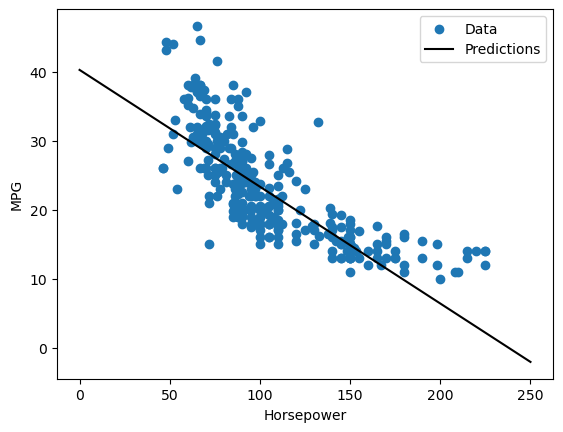

In [60]:
# Plot the results
hp1 = training_data['Horsepower']
mpg1 = training_data['MPG']

hp2 = tf.linspace(0, 250, 251)
mpg2 = model3.predict(hp2)

plot_HPvsMPG(hp1, mpg1, hp2, mpg2)

In [61]:
# See the final results
testing = model3.evaluate(testing_data['Horsepower'], testing_data['MPG'], verbose=0)
training = pd.DataFrame(history3.history).iloc[99]['loss']
results['Sampling'] = training, testing

In [62]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.237612,9.596869
Normalization,3.003903,7.795870
Sampling,3.768559,4.064760


## Model 4 (using Deep Learning)

In [63]:
# Define model 4
model4 = tf.keras.Sequential()

# Define layer 1
layer1 = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
layer1.adapt(np.array(training_data['Horsepower']))

# Define layer 2
layer2 = tf.keras.layers.Dense(64, activation='relu')

# Define layer 3
layer3 = tf.keras.layers.Dense(64, activation='relu')

# Define layer 4
layer4 = tf.keras.layers.Dense(1)

# Add layers
model4.add(layer1)
model4.add(layer2)
model4.add(layer3)
model4.add(layer4)

In [64]:
# Compile model 4
model4.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_absolute_error')

In [65]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [66]:
# Train model 4
history4 = model4.fit(
    training_data['Horsepower'],  # Feature
    training_data['MPG'],         # Label (Target value)
    epochs = 100,                 # Rounds of training
    verbose = 0,                  # Suppress logging
    validation_split = 0.2)       # Use 20% of the training data for validation

/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 0s 1ms/step


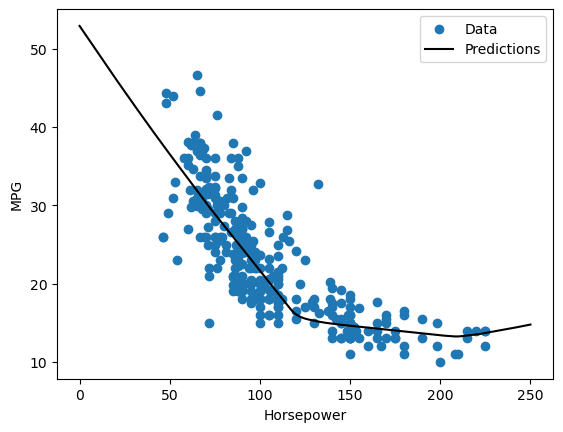

In [67]:
# Plot the results
hp1 = training_data['Horsepower']
mpg1 = training_data['MPG']

hp2 = tf.linspace(0, 250, 251)
mpg2 = model4.predict(hp2)

plot_HPvsMPG(hp1, mpg1, hp2, mpg2)

In [68]:
# Get the final results
testing = model4.evaluate(testing_data['Horsepower'], testing_data['MPG'], verbose=0)
training = pd.DataFrame(history4.history).iloc[99]['loss']
results['DeepLearning'] = training, testing

In [69]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.237612,9.596869
Normalization,3.003903,7.795870
Sampling,3.768559,4.064760
DeepLearning,3.237263,3.584451


## Model 5 (DL with multiple features)

In [70]:
# Define training data
training_data = data.sample(frac=.8, random_state=0)
training_features = training_data.drop("MPG", axis=1)
training_labels = training_data['MPG']

In [71]:
# Define testing data
testing_data = data.drop(training_data.index)
testing_features = testing_data.drop("MPG", axis=1)
testing_labels = testing_data['MPG']

In [72]:
# Define model 5
model5 = tf.keras.Sequential()

# Define layer 1
layer1 = tf.keras.layers.Normalization(axis=-1)
layer1.adapt(np.array(training_features))

# Define layer 2
layer2 = tf.keras.layers.Dense(64, activation='relu')

# Define layer 3
layer3 = tf.keras.layers.Dense(64, activation='relu')

# Define layer 4
layer4 = tf.keras.layers.Dense(1)

# Add layers
model5.add(layer1)
model5.add(layer2)
model5.add(layer3)
model5.add(layer4)

In [73]:
# Compile model 5
model5.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_absolute_error')

In [74]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


In [75]:
# Train model 5
history5 = model5.fit(
    training_features,
    training_labels,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [76]:
# Get final results
testing = model5.evaluate(testing_features, testing_labels, verbose=0)
training = pd.DataFrame(history5.history).iloc[99]['loss']
results['MultipleVars'] = training, testing

In [77]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.237612,9.596869
Normalization,3.003903,7.795870
Sampling,3.768559,4.064760
DeepLearning,3.237263,3.584451
MultipleVars,1.715256,2.186262


# 6) Further Steps

## Hyperparameter tuning

## Save your model

In [78]:
model5.save('mpg_model_5')

INFO:tensorflow:Assets written to: mpg_model_5/assets
